# Artificial Intelligence Internship Programm - CodeClause

# Task 2

# *Facial Emotions Detection*

<img src="jupyter.jpg" alt="Image Alt Text" width="900" height="200">

### About Project

#### Description:
The Facial Emotions Detection project is an exciting application of computer vision and machine learning that aims to automatically detect and classify emotions expressed in human faces. Emotions such as happiness, sadness, anger, fear, surprise, disgust, and neutrality are recognized from facial expressions captured in images or videos.

#### Project Overview:
In this project, we have developed a deep learning model to recognize facial emotions from images. The model has been trained on a large dataset of labeled facial images, enabling it to learn patterns and features associated with different emotions.


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import os
from tqdm import tqdm
from keras.utils import plot_model

# Importing Dataset

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d msambare/fer2013

 70% 42.0M/60.3M [00:00<00:00, 125MB/s]
100% 60.3M/60.3M [00:00<00:00, 143MB/s]


In [4]:
!unzip /content/fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [5]:
train_dir = '/content/train/'
test_dir = '/content/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print("Train Count \n",train_count)
print("***********************")
print("Test Count \n",test_count)

Train Count 
        happy   sad  fear  surprise  neutral  disgust  angry
train   7215  4830  4097      3171     4965      436   3995
***********************
Test Count 
       happy   sad  fear  surprise  neutral  disgust  angry
test   1774  1247  1024       831     1233      111    958


# Plot of number of images in training and testing set

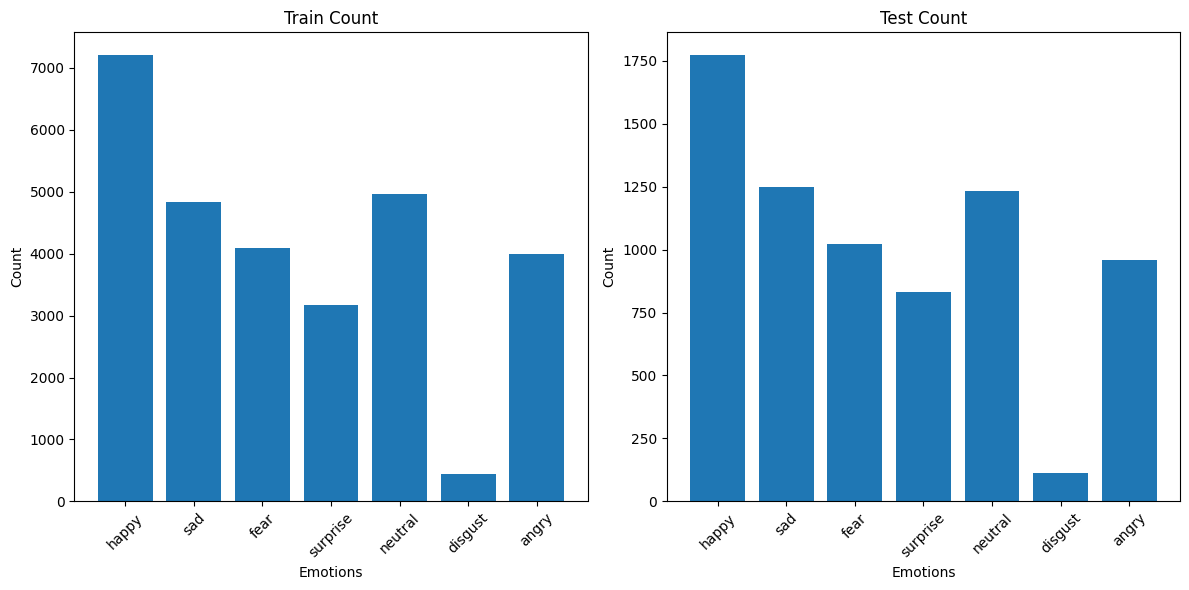

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Transpose the DataFrames to get categories as columns
train_df = train_count.T
test_df = test_count.T

# Plot bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Train Count
axes[0].bar(train_df.index, train_df['train'])
axes[0].set_title('Train Count')
axes[0].set_xlabel('Emotions')
axes[0].set_ylabel('Count')

# Plot Test Count
axes[1].bar(test_df.index, test_df['test'])
axes[1].set_title('Test Count')
axes[1].set_xlabel('Emotions')
axes[1].set_ylabel('Count')

# Rotate x-axis labels for better visibility
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# To see different classes images present in dataset

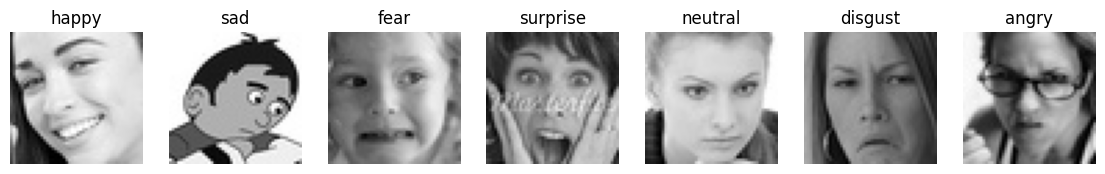

In [7]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

# Creating Training and test sets

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values between 0 and 1
    shear_range=0.2,  # apply random shear transformations
    zoom_range=0.2,  # apply random zoom transformations
    horizontal_flip=True  # flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1./255)  # normalize pixel values for test data

In [9]:
batch_size = 32

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # resize images to 48x48 pixels
    color_mode='grayscale',  # convert images to grayscale
    batch_size=batch_size,
    class_mode='categorical',  # use categorical labels
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Classes Present in Datasset

In [10]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [11]:
train_images, train_labels = next(train_data)
test_images, test_labels = next(test_data)

In [12]:
num_train_imgs = 0
for root,dirs,files in os.walk(train_dir):
    num_train_imgs+= len(files)

num_test_imgs = 0
for root,dirs,files in os.walk(test_dir):
    num_test_imgs+= len(files)

# Defining Model

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape = (48,48,1)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

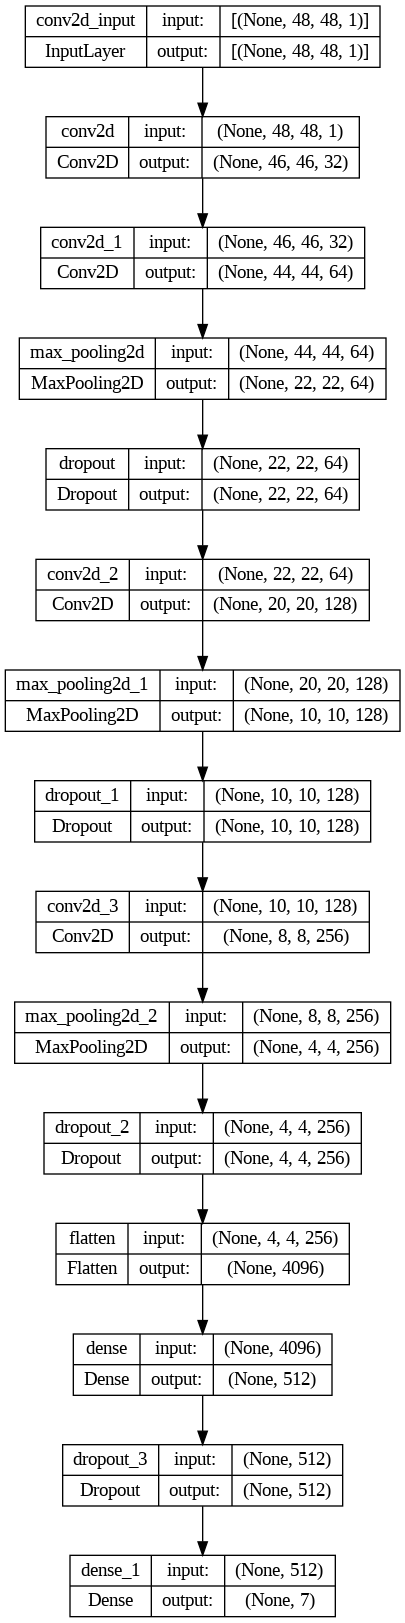

In [15]:
plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)

# Model Training

In [16]:
epochs = 150

model.fit(train_data,
                    steps_per_epoch=num_train_imgs//32,
                    validation_data=test_data,
                    validation_steps=num_test_imgs//32,
                    verbose = 1,
                    epochs=epochs)

Epoch 1/150
897/897 [==============================] - 42s 34ms/step - loss: 1.6968 - accuracy: 0.3179 - val_loss: 1.5081 - val_accuracy: 0.4270
Epoch 2/150
897/897 [==============================] - 32s 35ms/step - loss: 1.4806 - accuracy: 0.4264 - val_loss: 1.3430 - val_accuracy: 0.4775
Epoch 3/150
897/897 [==============================] - 32s 35ms/step - loss: 1.3594 - accuracy: 0.4743 - val_loss: 1.2821 - val_accuracy: 0.5071
Epoch 4/150
897/897 [==============================] - 29s 32ms/step - loss: 1.2855 - accuracy: 0.5101 - val_loss: 1.2021 - val_accuracy: 0.5386
Epoch 5/150
897/897 [==============================] - 28s 32ms/step - loss: 1.2377 - accuracy: 0.5278 - val_loss: 1.1921 - val_accuracy: 0.5469
Epoch 6/150
897/897 [==============================] - 32s 36ms/step - loss: 1.1947 - accuracy: 0.5425 - val_loss: 1.1459 - val_accuracy: 0.5652
Epoch 7/150
897/897 [==============================] - 30s 33ms/step - loss: 1.1656 - accuracy: 0.5585 - val_loss: 1.1302 - val_ac

##Save Model

In [17]:
model.save("model.h5")

# Evaluation and Vizualization of model preformance metrics of train data

898/898 [==============================] - 23s 26ms/step
Confusion Matrix
[[ 505   66  529 1059  709  693  434]
 [  59   12   68  107   71   80   39]
 [ 531   63  545 1063  742  691  462]
 [1022  106  882 1852 1243 1215  895]
 [ 642   70  646 1318  823  895  571]
 [ 608   76  649 1262  855  849  531]
 [ 417   54  401  861  580  523  335]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.13      0.13      3995
     disgust       0.03      0.03      0.03       436
        fear       0.15      0.13      0.14      4097
       happy       0.25      0.26      0.25      7215
     neutral       0.16      0.17      0.16      4965
         sad       0.17      0.18      0.17      4830
    surprise       0.10      0.11      0.10      3171

    accuracy                           0.17     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.17      0.17     28709



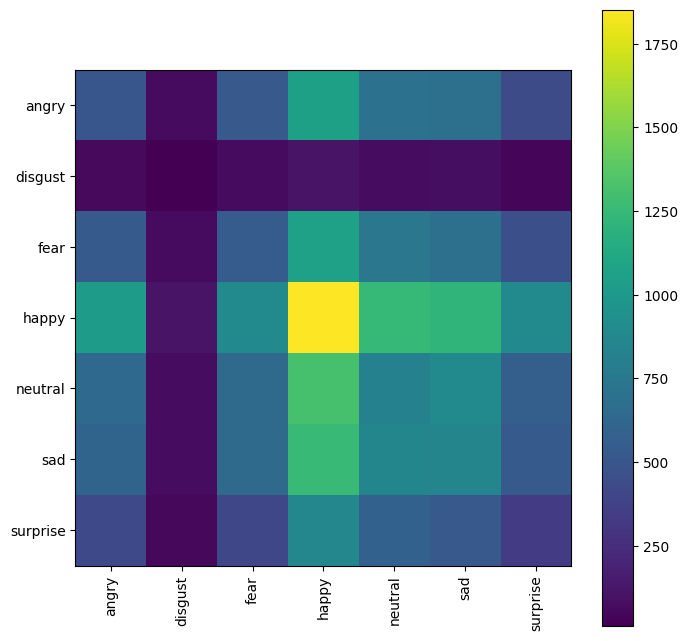

In [22]:
y_pred = model.predict(train_data)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_data.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_data.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_data.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

# Evaluation and Vizualization of model preformance metrics of test data


225/225 [==============================] - 3s 12ms/step
Confusion Matrix
[[ 517   11   99   56   94  152   29]
 [  23   64    6    4    3    7    4]
 [ 104    3  435   64  112  207   99]
 [  46    2   40 1509   76   65   36]
 [  67    3   79  127  711  208   38]
 [ 126    5  121  100  216  651   28]
 [  25    0   63   33   15   22  673]]
Classification Report
              precision    recall  f1-score   support

       angry       0.57      0.54      0.55       958
     disgust       0.73      0.58      0.64       111
        fear       0.52      0.42      0.47      1024
       happy       0.80      0.85      0.82      1774
     neutral       0.58      0.58      0.58      1233
         sad       0.50      0.52      0.51      1247
    surprise       0.74      0.81      0.77       831

    accuracy                           0.64      7178
   macro avg       0.63      0.61      0.62      7178
weighted avg       0.63      0.64      0.63      7178



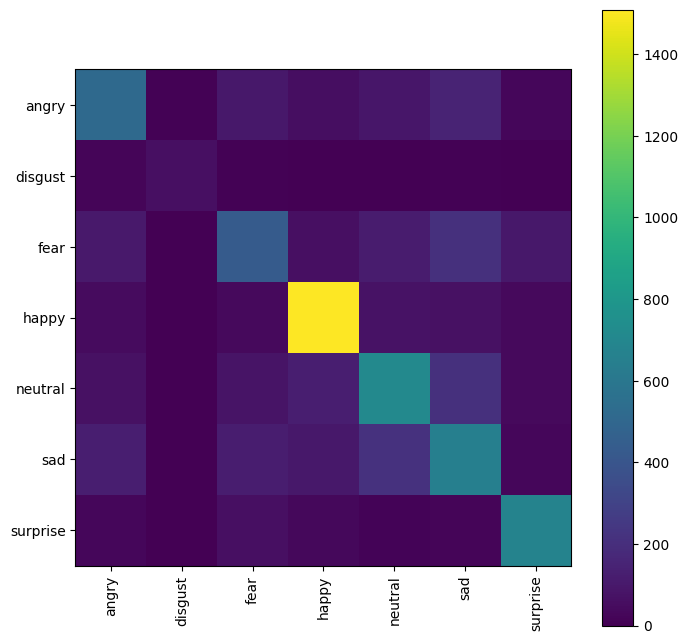

In [23]:
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_data.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(test_data.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_data.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

# Prediction on Image

1/1 [==============================] - 0s 33ms/step


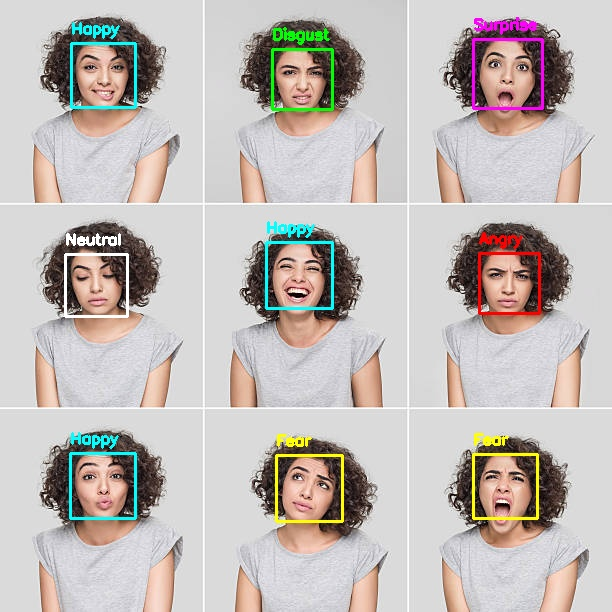

In [2]:
import cv2
import numpy as np
from keras.models import load_model
from IPython.display import display, Image

# Load the emotion recognition model
emotion_model = load_model('model.h5')

# Define the emotion labels and their corresponding colors
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
emotion_colors = [(0, 0, 255), (0, 255, 0), (0, 255, 255), (255, 255, 0), (255, 255, 255), (0, 0, 0), (255, 0, 255)]

# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the test image
test_image_path = 'test.jpg'  # Replace with the actual path to the test image
test_image = cv2.imread(test_image_path)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)  # Convert the test image to grayscale

# Perform face detection using the Haar cascade classifier
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Process each detected face
for (x, y, w, h) in faces:
    face_image = gray[y:y+h, x:x+w]  # Extract the face region from the grayscale frame

    # Preprocess the face image (e.g., resize, convert to grayscale, normalize, etc.)
    # ...
    resized_face_image = cv2.resize(face_image, (48, 48))
    normalized_face_image = resized_face_image / 255.0
    preprocessed_face_image = np.expand_dims(normalized_face_image, axis=0)

    # Perform emotion recognition using your trained model
    emotion_prediction = emotion_model.predict(preprocessed_face_image)
    emotion_index = np.argmax(emotion_prediction)
    emotion_label = emotion_labels[emotion_index]

    # Draw a rectangle around the face and label it with the predicted emotion
    cv2.rectangle(test_image, (x, y), (x+w, y+h), emotion_colors[emotion_index], 2)
    cv2.putText(test_image, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, emotion_colors[emotion_index], 2)

# Save the processed image to a temporary file
temp_image_path = 'temp_output.jpg'
cv2.imwrite(temp_image_path, test_image)

# Display the processed image in the output cell
display(Image(filename=temp_image_path))

# Remove the temporary file
import os
os.remove(temp_image_path)
